# Mobile Price Classification

In this project, instead of predicting the exact prices of mobile phones, a machine learning model is developed to classify them into price ranges (low, medium, high, very high) based on their features. Python is used for data analysis, preprocessing, and classification algorithms.

**Price ranges of mobile phones:**
- **0 — low cost**
- **1 — medium cost**
- **2 — high cost**
- **3 — very high cost**

   

[AmanxAI Mobile Price Classification](https://amanxai.com/2021/03/05/mobile-price-classification-with-machine-learning/)


<img src="https://blogassets.airtel.in/wp-content/uploads/2024/09/mobile-phone-copy-space-held-hand.jpg" alt="Mobile Price Image" width="400">



## Data Read 

In [2]:
import pandas as pd 
pd.set_option("display.max_columns",None)

In [3]:
df = pd.read_csv('mobile_prices.csv')

## EDA - Exploratory Data Analysis 

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [6]:
df.sample(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
253,835,0,1.1,1,2,0,7,0.2,101,4,7,323,1604,1181,13,5,15,1,1,1,0
519,1928,1,1.8,0,9,1,19,1.0,187,3,20,691,1580,3777,7,2,13,1,1,1,3
1359,1949,1,0.5,1,2,1,31,0.1,145,5,9,837,1182,832,7,3,19,1,0,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 

<Axes: >

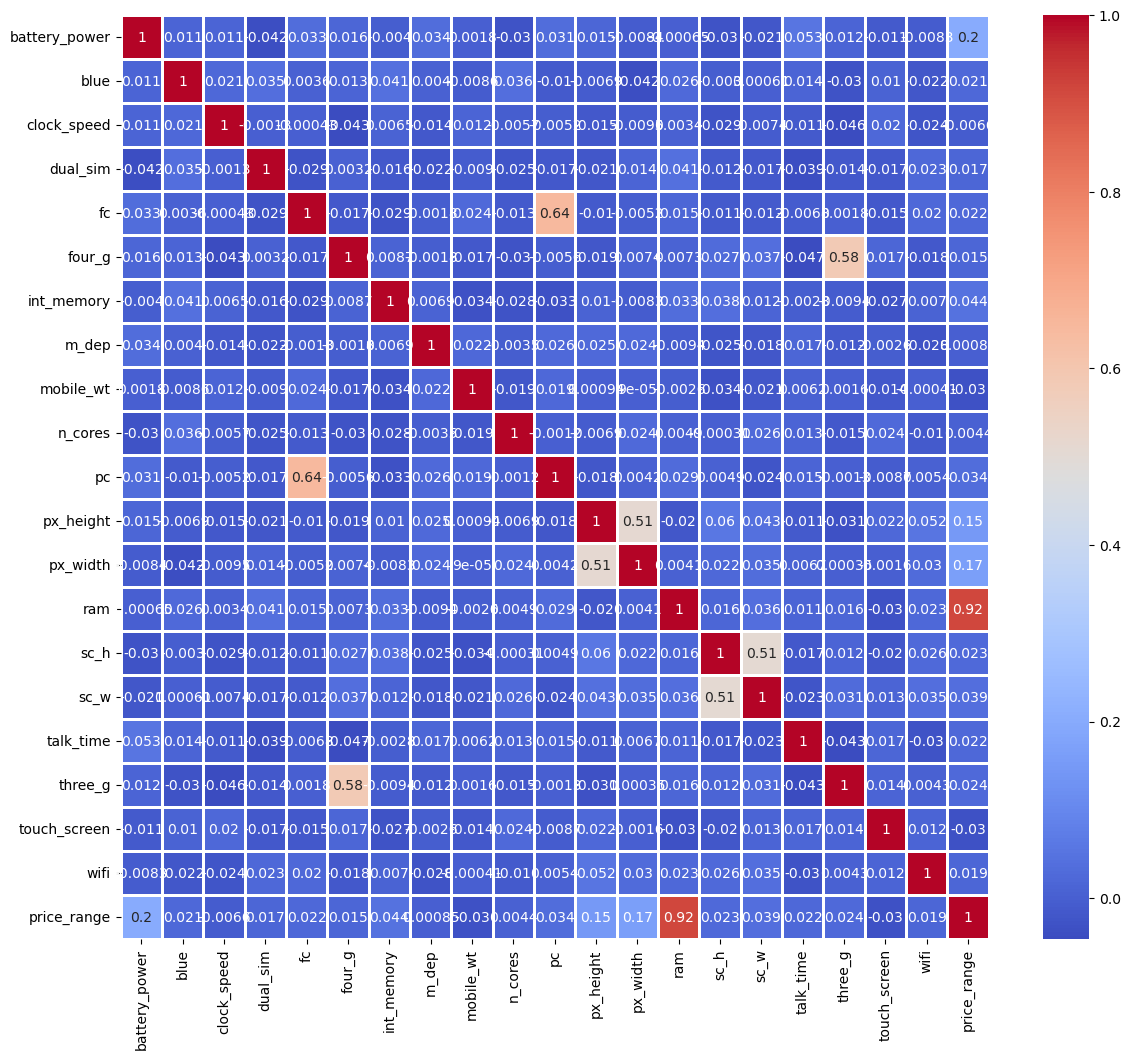

In [11]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linecolor='white',linewidths=1)

## Modelling 

In [12]:
x = df.iloc[:, :-1].values # Son sütun hariç tüm sütunları alıyor 
y=df.iloc[:, -1].values   # Son sütunu alıyor 

In [14]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [19]:
lreg = LogisticRegression()

In [20]:
lreg.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [21]:
y_pred = lreg.predict(x_test)

In [22]:
accuracy_score(y_test, y_pred)

0.9775

In [23]:
print(y_pred)

[0 2 1 3 1 1 2 0 3 1 0 1 2 3 3 2 3 3 1 0 0 2 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 2 2 2 1 3 1 3 1 0 0 1 1 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 1 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 3 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 3 1 3 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 3 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 3 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 2 3 0 3 1 2 3 3 2 1 0 3 3 1 3 3 3
 3 3 0 1 2 2 2 3 0 2 3 2 2 2 1 0 2 0 3 3 1 3 1 1 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 3 3 3 1 0 1 0 1 2 3 0 3
 3 2 1 3 0 0 3 1 3 2 0 1 1 1 1 1 3 1 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 3
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2]


In [25]:
import numpy as np

In [27]:
# Tahmin edilen sınıfların (y_pred) dağılımını hesaplayıp okunaklı gösterir
(unique, counts) = np.unique(y_pred, return_counts=True)  #y_pred içindeki benzersiz sınıfları ve her birinin kaç kez tahmin edildiğini döndürür
price_range = np.asarray((unique, counts)).T  # # 'unique' ve 'counts'u yan yana getirip (sınıf, adet) formatında tablo oluşturur
print(price_range)

[[  0 102]
 [  1  96]
 [  2  88]
 [  3 114]]


## Conclusion

- Mobile price classification was performed using Logistic Regression.  
- After scaling and an 80/20 train-test split, the model achieved **97.75% accuracy**.  
- Test prediction distribution: 0:102, 1:96, 2:88, 3:114.  

In [28]:
import joblib
from sklearn.pipeline import Pipeline

x = df.iloc[:, :-1]
y = df.iloc[:, -1]
pipe = Pipeline([("scaler", StandardScaler()), ("clf", LogisticRegression(max_iter=1000))]).fit(x, y)
joblib.dump(pipe, "mobile_price.pkl")  # scaler + model tek dosya
# Ölçekleme unutulmasın ve sıra karışmasın diye Pipeline içinde paketliyoruz.

['mobile_price.pkl']